In [1]:
import pandas as pd
import numpy as np
import sklearn 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Importing required basic libraries

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [3]:
electronics_df=pd.read_csv('/content/gdrive/MyDrive/electronics.csv')

In [4]:
modcloth_df=pd.read_csv('/content/gdrive/MyDrive/modcloth.csv')

In [5]:
electronics_df.head()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0


In [6]:
modcloth_df.head()

,item_id,user_id,rating,timestamp,size,fit,user_attr,model_attr,category,brand,year,split
0,7443,Alex,4,2010-01-21 08:00:00+00:00,NaN,NaN,Small,Small,Dresses,NaN,2012,0
1,7443,carolyn.agan,3,2010-01-27 08:00:00+00:00,NaN,NaN,NaN,Small,Dresses,NaN,2012,0
2,7443,Robyn,4,2010-01-29 08:00:00+00:00,NaN,NaN,Small,Small,Dresses,NaN,2012,0
3,7443,De,4,2010-02-13 08:00:00+00:00,NaN,NaN,NaN,Small,Dresses,NaN,2012,0
4,7443,tasha,4,2010-02-18 08:00:00+00:00,NaN,NaN,Small,Small,Dresses,NaN,2012,0


In [7]:
electronics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   item_id     1292954 non-null  int64  
 1   user_id     1292954 non-null  int64  
 2   rating      1292954 non-null  float64
 3   timestamp   1292954 non-null  object 
 4   model_attr  1292954 non-null  object 
 5   category    1292954 non-null  object 
 6   brand       331120 non-null   object 
 7   year        1292954 non-null  int64  
 8   user_attr   174124 non-null   object 
 9   split       1292954 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 98.6+ MB


In [8]:
electronics_df.describe()

,item_id,user_id,rating,year,split
count,1.292954e+06,1.292954e+06,1.292954e+06,1.292954e+06,1.292954e+06
mean,4.183588e+03,5.605127e+05,4.051482e+00,2.012938e+03,1.747587e-01
std,2.525346e+03,3.342374e+05,1.379732e+00,2.643513e+00,5.506810e-01
min,0.000000e+00,0.000000e+00,1.000000e+00,1.999000e+03,0.000000e+00
25%,2.018000e+03,2.697482e+05,4.000000e+00,2.012000e+03,0.000000e+00
50%,3.930000e+03,5.518920e+05,5.000000e+00,2.014000e+03,0.000000e+00
75%,6.289000e+03,8.474858e+05,5.000000e+00,2.015000e+03,0.000000e+00
max,9.559000e+03,1.157632e+06,5.000000e+00,2.018000e+03,2.000000e+00


In [9]:
len(electronics_df)-len(electronics_df.drop_duplicates())

0

In [10]:
len(modcloth_df)-len(modcloth_df.drop_duplicates())

0

In [11]:
electronics_df['user_id'].nunique()

1157633

In [12]:
modcloth_df['user_id'].nunique()

44783

In [13]:
dp=electronics_df.duplicated().sum()

In [14]:
dp

0

In [15]:

electronics_df.isnull().sum().sort_values(ascending=False)

user_attr     1118830
brand          961834
split               0
year                0
category            0
model_attr          0
timestamp           0
rating              0
user_id             0
item_id             0
dtype: int64

In [16]:
modcloth_df.isnull().sum().sort_values(ascending=False)

brand         73980
size          21760
fit           18506
user_attr      8367
user_id           1
split             0
year              0
category          0
model_attr        0
timestamp         0
rating            0
item_id           0
dtype: int64

In [17]:
df=pd.concat([electronics_df,modcloth_df])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1392847 entries, 0 to 99892
Data columns (total 12 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   item_id     1392847 non-null  int64  
 1   user_id     1392846 non-null  object 
 2   rating      1392847 non-null  float64
 3   timestamp   1392847 non-null  object 
 4   model_attr  1392847 non-null  object 
 5   category    1392847 non-null  object 
 6   brand       357033 non-null   object 
 7   year        1392847 non-null  int64  
 8   user_attr   265650 non-null   object 
 9   split       1392847 non-null  int64  
 10  size        78133 non-null    float64
 11  fit         81387 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 138.1+ MB


In [19]:
df.head()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split,size,fit
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0,NaN,NaN
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0,NaN,NaN
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0,NaN,NaN
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0,NaN,NaN
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0,NaN,NaN


In [20]:


df['item_id'].nunique()

10578

In [21]:

df['user_id'].nunique()

1202416

In [22]:
len(df)-len(df.drop_duplicates())

0

In [23]:
item_uniq=len(df['item_id'].unique())
user_uniq=len(df['user_id'].unique())
print("No. of unique items:{} and No. of unique user: {} are there in our dataset".format(item_uniq,user_uniq))

No. of unique items:10578 and No. of unique user: 1202417 are there in our dataset


In [24]:
pd.set_option('display.max_columns',None)
print(df.describe(exclude=[np.object]).T)
q1=df.quantile(0.25)
q3=df.quantile(0.75)
IQR=q3=q1
print("IQR for dataset is : {}".format(IQR))


             count         mean           std     min     25%     50%     75%  \
item_id  1392847.0  9903.897758  23780.755004     0.0  2129.0  4294.0  6865.0   
rating   1392847.0     4.062822      1.361083     1.0     4.0     5.0     5.0   
year     1392847.0  2013.120348      2.682213  1999.0  2012.0  2014.0  2015.0   
split    1392847.0     0.187941      0.566596     0.0     0.0     0.0     0.0   
size       78133.0     3.217322      1.885934     0.0     2.0     3.0     4.0   

              max  
item_id  155950.0  
rating        5.0  
year       2019.0  
split         2.0  
size          8.0  
IQR for dataset is : item_id    2129.0
rating        4.0
year       2012.0
split         0.0
size          2.0
Name: 0.25, dtype: float64



    Every user in the dataset has rated atleast one product.
    The Minimum rating that a product has received in 1.0 and the max rating the product has received is 5.0.
    The range of dispersion for rating is 1-5.

    The average/mean rating by all users to our products is 4.06, with standard deviation 0f 1.36. Our data points are quite widely spread from the mean.

    Our First Qaurtile 25% is 4 which means 25% of data points fall at or below it.
    Our median second Qaurtile at 50% is 5.
    Our Third quartile 75% is 5.


First we will create model based on Rating of products i.e. popularity based model


In [25]:
pop_df=df[['item_id','user_id','rating']]

In [26]:
pop_df

,item_id,user_id,rating
0,0,0,5.0
1,0,1,5.0
2,0,2,3.0
3,0,3,1.0
4,0,4,2.0
...,...,...,...
99888,154797,BernMarie,5.0
99889,77949,Sam,4.0
99890,67194,Janice,5.0
99891,71607,amy,3.0


In [27]:
rating_group=pop_df.groupby('rating')['rating'].count()

In [28]:
rating_group

rating
1.0    147278
2.0     84499
3.0    111990
4.0    238757
5.0    810323
Name: rating, dtype: int64

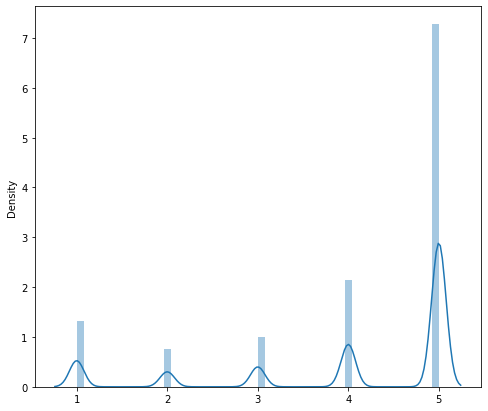

In [29]:
plt.figure(figsize=(8,7))
sns.distplot(x=pop_df['rating'],norm_hist=True)

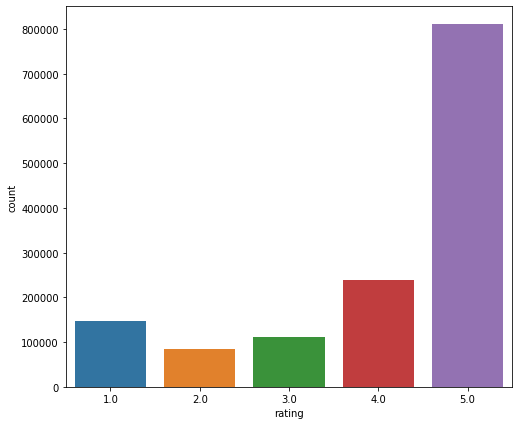

In [30]:
plt.figure(figsize=(8,7))
sns.countplot(x=pop_df['rating'])

In [31]:
pop_df['rating'].skew()

-1.2644610554838833

In [32]:
rating_group_user=pop_df.groupby('user_id')['rating'].count()
rating_group_item=pop_df.groupby('item_id')['rating'].count()
most_occured_item=pop_df['item_id'].value_counts().idxmax()
most_frequent_user=pop_df['user_id'].value_counts().idxmax()
print("The max number of rating we have received for the product is:{} and the item ID is: {}".format(rating_group_item.max(),most_occured_item))
print("Most frequent user is: {} and maximum rating given is:{}".format(most_frequent_user,rating_group_user.max()))

The max number of rating we have received for the product is:28530 and the item ID is: 7780
Most frequent user is: Sarah and maximum rating given is:250


I am using pandas join and groupby to get the count of number of ratings given by each user.

In [33]:
pop_df_rating=pop_df.join(pop_df.groupby('user_id')['rating'].count(),on='user_id',rsuffix='_user_count')

In [34]:
pop_df_rating.head()

,item_id,user_id,rating,rating_user_count
0,0,0,5.0,1.0
1,0,1,5.0,1.0
2,0,2,3.0,1.0
3,0,3,1.0,1.0
4,0,4,2.0,1.0


In [35]:

pop_df_rating['rating_user_count'].nunique()

133

In [36]:
pop_df_rating['rating_user_count'].value_counts().sort_values(ascending=False)

1.0     1085130
2.0      180170
3.0       51393
4.0       20148
5.0        9780
         ...   
74.0         74
72.0         72
71.0         71
52.0         52
50.0         50
Name: rating_user_count, Length: 133, dtype: int64

In [37]:
pop_df_product=pop_df_rating.join(pop_df_rating.groupby('item_id')['rating'].count(),on='item_id',rsuffix='_item_count')

In [38]:
pop_df_product.head()

,item_id,user_id,rating,rating_user_count,rating_item_count
0,0,0,5.0,1.0,118
1,0,1,5.0,1.0,118
2,0,2,3.0,1.0,118
3,0,3,1.0,1.0,118
4,0,4,2.0,1.0,118


Popularity based on user rating and number of ratings received by each product

In [39]:
popularity_df=pd.DataFrame(pop_df_product.groupby('item_id')['rating','rating_item_count'].mean().sort_values(by='rating_item_count',ascending=False))

In [40]:
popularity_df.head(15)

,rating,rating_item_count
item_id,,
7780,4.400911,28530
2031,4.418184,9393
1575,4.218743,8622
2279,4.168844,6278
2486,4.306368,5810
2340,4.625734,5790
5795,3.921318,5554
1715,4.797337,5482
1124,3.998879,5353


In [41]:

#Popularity based on user rating

In [42]:
popular_by_rating=pd.DataFrame(pop_df_product.groupby('item_id')['rating','rating_item_count'].mean().sort_values(by='rating',ascending=False))

In [43]:
popular_by_rating.head()

,rating,rating_item_count
item_id,,
153196,5.0,8
8657,5.0,15
9151,5.0,9
2822,5.0,5
221,5.0,6


Rating count for each scale

In [44]:
segregate=pd.DataFrame(pop_df.groupby('item_id')['rating'].value_counts().unstack().fillna(0))
segregate

rating,1.0,2.0,3.0,4.0,5.0
item_id,,,,,
0,17.0,15.0,16.0,27.0,43.0
1,8.0,6.0,3.0,11.0,30.0
2,105.0,107.0,220.0,643.0,2329.0
3,42.0,15.0,14.0,30.0,54.0
4,3.0,1.0,0.0,0.0,7.0
...,...,...,...,...,...
155308,0.0,0.0,0.0,3.0,7.0
155317,0.0,2.0,4.0,14.0,46.0
155537,0.0,1.0,2.0,3.0,5.0


In [45]:
popularity_final=pd.merge(popular_by_rating,segregate,on='item_id')

In [46]:
popularity_final.head()

,rating,rating_item_count,1.0,2.0,3.0,4.0,5.0
item_id,,,,,,,
153196,5.0,8,0.0,0.0,0.0,0.0,8.0
8657,5.0,15,0.0,0.0,0.0,0.0,15.0
9151,5.0,9,0.0,0.0,0.0,0.0,9.0
2822,5.0,5,0.0,0.0,0.0,0.0,5.0
221,5.0,6,0.0,0.0,0.0,0.0,6.0


In [47]:
popularity_final.nlargest(15,'rating_item_count')

,rating,rating_item_count,1.0,2.0,3.0,4.0,5.0
item_id,,,,,,,
7780,4.400911,28530,1808.0,1079.0,1391.0,3841.0,20411.0
2031,4.418184,9393,525.0,320.0,522.0,1361.0,6665.0
1575,4.218743,8622,459.0,448.0,825.0,1906.0,4984.0
2279,4.168844,6278,667.0,278.0,426.0,864.0,4043.0
2486,4.306368,5810,374.0,246.0,409.0,978.0,3803.0
2340,4.625734,5790,132.0,121.0,210.0,856.0,4471.0
5795,3.921318,5554,629.0,435.0,538.0,1094.0,2858.0
1715,4.797337,5482,95.0,52.0,79.0,417.0,4839.0
1124,3.998879,5353,524.0,449.0,511.0,894.0,2975.0



So, above is the popularity based recommendation that we have created and I am highlighting the top 15 products that are popular among users along with average rating, number of ratings the product has received and its splitup on number of rating for each scale between 1 to 5

Next we will use Collaborative method

Item Id : 7780 is Most popular amongst all with highest rating of 28530

 **Collaborative Filtering model**

Collaborative filtering works on the similarity between different users or similarity between items.The similarity could be used to recommend the products based on user or item behaviour.

Couple of methods to implement Collaborative filtering :

    1.Matrix Factorization using Singular value decomposition
    2.Nearest Neighbour collaborative filtering (User based and Item based)


**Matrix Factorization using Singular value decomposition**


    1.The user & item data is first made avaiable as a matrix. Product and user charecterstics is computed for each user and each item.
    2.Dot product of these charectersics will give the predictions for each user for each item in the matrix.
    3.Now since we have the actual and the predicted data the algorithm will further use gradient descent to find the minimal error to predict the closest possible rating for the user.


In [48]:
!pip install surprise

In [49]:
from surprise import SVD
from surprise import Dataset
from surprise import Reader

In [50]:
modcloth_df.head()

,item_id,user_id,rating,timestamp,size,fit,user_attr,model_attr,category,brand,year,split
0,7443,Alex,4,2010-01-21 08:00:00+00:00,NaN,NaN,Small,Small,Dresses,NaN,2012,0
1,7443,carolyn.agan,3,2010-01-27 08:00:00+00:00,NaN,NaN,NaN,Small,Dresses,NaN,2012,0
2,7443,Robyn,4,2010-01-29 08:00:00+00:00,NaN,NaN,Small,Small,Dresses,NaN,2012,0
3,7443,De,4,2010-02-13 08:00:00+00:00,NaN,NaN,NaN,Small,Dresses,NaN,2012,0
4,7443,tasha,4,2010-02-18 08:00:00+00:00,NaN,NaN,Small,Small,Dresses,NaN,2012,0


In [51]:
reader=Reader(rating_scale=(1.0, 5.0))

In [52]:
data_for_matrix=Dataset.load_from_df(modcloth_df[['user_id','item_id','rating']],reader)

In [53]:
data_for_matrix



In [54]:


from surprise.model_selection.split import train_test_split
X,Y=train_test_split(data_for_matrix,test_size=0.3)



In [55]:
M1=SVD()

In [56]:
M1.fit(X)

In [57]:
predictions=M1.test(Y)

In [58]:
predictions

[Prediction(uid='Stacey', iid=152873, r_ui=5.0, est=4.0394103192108535, details={'was_impossible': False}),
 Prediction(uid='cherie11385', iid=47397, r_ui=5.0, est=3.449081513340896, details={'was_impossible': False}),
 Prediction(uid='melania91', iid=114610, r_ui=5.0, est=4.2351789450535335, details={'was_impossible': False}),
 Prediction(uid='River', iid=60724, r_ui=2.0, est=3.63102440204508, details={'was_impossible': False}),
 Prediction(uid='carolyn', iid=145314, r_ui=4.0, est=4.332357750801701, details={'was_impossible': False}),
 Prediction(uid='RayLo', iid=146503, r_ui=5.0, est=4.6556365605426535, details={'was_impossible': False}),
 Prediction(uid='tiiunineteen82', iid=80841, r_ui=5.0, est=4.412535965592523, details={'was_impossible': False}),
 Prediction(uid='Kayla', iid=11960, r_ui=4.0, est=3.7028127636846695, details={'was_impossible': False}),
 Prediction(uid='Klincolnlog', iid=82288, r_ui=4.0, est=4.6925054193550375, details={'was_impossible': False}),
 Prediction(uid='Su



Now using the below function we will map the procuct id's(iid and est rating) for each user and also will sort the first 5 products recommended for each user


In [59]:
from collections import defaultdict
def get_top_n(predictions, n=5):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [60]:
top_n = get_top_n(predictions,n=5)

In [61]:




top_n



defaultdict(list,
            {'Stacey': [(54222, 4.816539812264496),
              (82256, 4.5806276003652915),
              (135264, 4.462213286228543),
              (70538, 4.402346086864285),
              (40899, 4.3962583548726135)],
             'cherie11385': [(11960, 3.806231983096381),
              (47397, 3.449081513340896)],
             'melania91': [(114610, 4.2351789450535335)],
             'River': [(60724, 3.63102440204508)],
             'carolyn': [(145313, 4.647105856029083),
              (152911, 4.5895908009979465),
              (67397, 4.496760335705029),
              (155305, 4.4424144464651),
              (145314, 4.332357750801701)],
             'RayLo': [(146503, 4.6556365605426535)],
             'tiiunineteen82': [(80841, 4.412535965592523)],
             'Kayla': [(67022, 5.0),
              (76049, 4.965966192676584),
              (80238, 4.894856651974635),
              (55967, 4.837941614975314),
              (49525, 4.767702535164601)],
   

In [62]:
from surprise import accuracy

In [63]:
print("The Root Mean Square Error for the Matrix Factorization using SVD:{}".format(accuracy.rmse(predictions,verbose=False)))
print("The Mean Absolute Error for the Matrix Factorization using SVD:{}".format(accuracy.mae(predictions,verbose=False)))

The Root Mean Square Error for the Matrix Factorization using SVD:1.0592632292781374
The Mean Absolute Error for the Matrix Factorization using SVD:0.8293431313864943


**Collaborative Filtering Using KNNwithMeans**

KNNWith means is a nearest neighbour mapping method , that is used to recommend users the products based on the what your closest neighbour has bought/liked.


In [64]:
from surprise import KNNWithMeans

In [65]:

subset=modcloth_df.head(5000)

In [66]:
subset.shape

(5000, 12)

In [67]:
data_for_collab=Dataset.load_from_df(subset[['user_id','item_id','rating']],reader)
trainset,testset=train_test_split(data_for_collab,test_size=.15)

In [68]:
parm_grid={'k':[50,60,70],'name':["cosine","pearson_baseline"],'user_based':[True,False]}

In [69]:


from surprise.model_selection import GridSearchCV
from surprise.model_selection import cross_validate
from surprise.model_selection import cross_validate
Grid_1=GridSearchCV(KNNWithMeans,parm_grid,measures=["rmse", "mae"],cv=3)



In [70]:
Grid_1.fit(data_for_collab)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [71]:



Grid_1.best_params['rmse']



{'k': 50, 'name': 'cosine', 'user_based': True}

In [72]:
Grid_1.best_estimator

{'mae': <surprise.prediction_algorithms.knns.KNNWithMeans at 0x7fbe9ca667d0>,
 'rmse': <surprise.prediction_algorithms.knns.KNNWithMeans at 0x7fbe996933d0>}

In [73]:
Grid_1.best_score

{'mae': 0.7934075150947888, 'rmse': 1.029057142230836}

In [74]:
M2=KNNWithMeans(k=50,sim_options={'name': 'cosine', 'min_support': 5, 'user_based': True,'k':5},verbose= True,c=3)

In [75]:
M2.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [76]:
pred2=M2.test(testset)

In [77]:
pred2

[Prediction(uid='April', iid=16411, r_ui=5.0, est=4.301882352941177, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='colombina0127', iid=32236, r_ui=5.0, est=4.301882352941177, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Genny', iid=16411, r_ui=4.0, est=4.301882352941177, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='acmckinney815', iid=65046, r_ui=3.0, est=4.301882352941177, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Olivia', iid=40899, r_ui=5.0, est=4.0, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='carterh', iid=34935, r_ui=5.0, est=4.301882352941177, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Leighann', iid=7443, r_ui=3.0, est=4.5, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='pantha_pinky', iid=1

In [78]:
print("The Root Mean Square Error for KNNwithMeans using user user similarity:{}".format(accuracy.rmse(pred2,verbose=False)))
print("The Mean Absolute Error for KNNwithMeans using user user similarity:{}".format(accuracy.mae(pred2,verbose=False)))

The Root Mean Square Error for KNNwithMeans using user user similarity:0.9936084086332455
The Mean Absolute Error for KNNwithMeans using user user similarity:0.7484337404295052


In [79]:
M3=KNNWithMeans(k=50,sim_options={'name': 'cosine', 'min_support': 5, 'user_based': False,'k':5},verbose= True,c=3)

In [80]:


M3



In [81]:
M3.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [82]:


pred3=M3.test(testset)



In [83]:


pred3



[Prediction(uid='April', iid=16411, r_ui=5.0, est=4.301882352941177, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='colombina0127', iid=32236, r_ui=5.0, est=4.301882352941177, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Genny', iid=16411, r_ui=4.0, est=4.301882352941177, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='acmckinney815', iid=65046, r_ui=3.0, est=4.301882352941177, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Olivia', iid=40899, r_ui=5.0, est=4.390625, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='carterh', iid=34935, r_ui=5.0, est=4.301882352941177, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Leighann', iid=7443, r_ui=3.0, est=4.3397884390674095, details={'actual_k': 2, 'was_impossible': False}),
 Prediction(uid='

In [84]:
print("The Root Mean Square Error for KNNwithMeans using item item similarity:{}".format(accuracy.rmse(pred3,verbose=False)))
print("The Mean Absolute Error for KNNwithMeans using item item similarity:{}".format(accuracy.mae(pred3,verbose=False)))

The Root Mean Square Error for KNNwithMeans using item item similarity:0.9597580578297399
The Mean Absolute Error for KNNwithMeans using item item similarity:0.7413857230148451


In [85]:


print("The top 5 products that we recommend using popularity based recommendation:")

print(popularity_final.nlargest(5,'rating_item_count'))



The top 5 products that we recommend using popularity based recommendation:
           rating  rating_item_count     1.0     2.0     3.0     4.0      5.0
item_id                                                                      
7780     4.400911              28530  1808.0  1079.0  1391.0  3841.0  20411.0
2031     4.418184               9393   525.0   320.0   522.0  1361.0   6665.0
1575     4.218743               8622   459.0   448.0   825.0  1906.0   4984.0
2279     4.168844               6278   667.0   278.0   426.0   864.0   4043.0
2486     4.306368               5810   374.0   246.0   409.0   978.0   3803.0


In [86]:
top_n

defaultdict(list,
            {'Stacey': [(54222, 4.816539812264496),
              (82256, 4.5806276003652915),
              (135264, 4.462213286228543),
              (70538, 4.402346086864285),
              (40899, 4.3962583548726135)],
             'cherie11385': [(11960, 3.806231983096381),
              (47397, 3.449081513340896)],
             'melania91': [(114610, 4.2351789450535335)],
             'River': [(60724, 3.63102440204508)],
             'carolyn': [(145313, 4.647105856029083),
              (152911, 4.5895908009979465),
              (67397, 4.496760335705029),
              (155305, 4.4424144464651),
              (145314, 4.332357750801701)],
             'RayLo': [(146503, 4.6556365605426535)],
             'tiiunineteen82': [(80841, 4.412535965592523)],
             'Kayla': [(67022, 5.0),
              (76049, 4.965966192676584),
              (80238, 4.894856651974635),
              (55967, 4.837941614975314),
              (49525, 4.767702535164601)],
   

In [87]:
def get_top_user(pred2,n=5):
  top_n=defaultdict(list)
  for uid,iid,true_r,est,_ in pred2:
    top_n[uid].append((iid,est))
  for uid,user_ratings in top_n.items():
    user_ratings.sort(key=lambda x: x[1],reverse=True)
    top_n[uid]=user_ratings[:n]
  return top_n
Top_CF_user=get_top_user(pred2,n=5)

# For each user Print the recommended items
for uid, user_ratings in Top_CF_user.items():
    print(uid, [iid for (iid, _) in user_ratings])

April [16411]
colombina0127 [32236]
Genny [16411]
acmckinney815 [65046]
Olivia [40899, 22563]
carterh [34935]
Leighann [7443]
pantha_pinky [16411]
thejenniferrichmond [56780]
crystalsbirdtoys [32405]
Bri [34935]
Midori [11960]
Nadia [16411]
allison.farrington [31752]
h.l.workman [34931]
vintagegirl [7443]
tayler.schmidt09 [7443]
tontoxyz [27590]
Krischelle [59176, 40899]
Lyn [32403]
Angelica [22563]
Adrienne [52406]
Muriel [11960]
Cassidy [31644]
hippiejo74 [16411]
ModCloth [34931, 21296, 49587]
amelia.schubmehl [31644]
Mazette [11960]
reeshelle84 [34935]
Whitney [16411]
Kristin [28252]
Susan [57369, 32406, 32405]
aalmaguer51 [31644]
jenny.ann.martin [32403]
Anne [62482]
kelly [16411]
mmrthesen1 [32405]
scholewa675 [22563]
erinhoffman81 [22563]
jane.seymour [40899]
wordworthy [16411]
redubit [40899]
ljaxon21 [32405]
sessalee [31644]
Dawn [34931]
Firefly [16411]
Gretchen [31752]
sharonvisoky [65046]
sarahkmellon [21296]
tr6014 [32406]
holly.kenmare [34935]
amelie423 [11960]
mrs.jessicar

In [88]:
def get_top_item(pred3,n=5):
  top_n=defaultdict(list)
  for uid,iid,true_r,est,_ in pred3:
    top_n[uid].append((iid,est))
  for uid,user_ratings in top_n.items():
    user_ratings.sort(key=lambda x: x[1],reverse=True)
    top_n[uid]=user_ratings[:n]
  return top_n
Top_CF_item=get_top_item(pred3)

# For each user Print the recommended items
df_item=pd.DataFrame()
for uid, user_ratings in Top_CF_item.items():
    print(uid, [iid for (iid, _) in user_ratings])

April [16411]
colombina0127 [32236]
Genny [16411]
acmckinney815 [65046]
Olivia [40899, 22563]
carterh [34935]
Leighann [7443]
pantha_pinky [16411]
thejenniferrichmond [56780]
crystalsbirdtoys [32405]
Bri [34935]
Midori [11960]
Nadia [16411]
allison.farrington [31752]
h.l.workman [34931]
vintagegirl [7443]
tayler.schmidt09 [7443]
tontoxyz [27590]
Krischelle [59176, 40899]
Lyn [32403]
Angelica [22563]
Adrienne [52406]
Muriel [11960]
Cassidy [31644]
hippiejo74 [16411]
ModCloth [34931, 21296, 49587]
amelia.schubmehl [31644]
Mazette [11960]
reeshelle84 [34935]
Whitney [16411]
Kristin [28252]
Susan [32406, 32405, 57369]
aalmaguer51 [31644]
jenny.ann.martin [32403]
Anne [62482]
kelly [16411]
mmrthesen1 [32405]
scholewa675 [22563]
erinhoffman81 [22563]
jane.seymour [40899]
wordworthy [16411]
redubit [40899]
ljaxon21 [32405]
sessalee [31644]
Dawn [34931]
Firefly [16411]
Gretchen [31752]
sharonvisoky [65046]
sarahkmellon [21296]
tr6014 [32406]
holly.kenmare [34935]
amelie423 [11960]
mrs.jessicar

In [89]:
print("The Root Mean Square Error for the Matrix Factorization using SVD:{}".format(accuracy.rmse(predictions,verbose=False)))
print("The Mean Absolute Error for the Matrix Factorization using SVD:{}".format(accuracy.mae(predictions,verbose=False)))
print("The Root Mean Square Error for KNNwithMeans using user user similarity:{}".format(accuracy.rmse(pred2,verbose=False)))
print("The Mean Absolute Error for KNNwithMeans using user user similarity:{}".format(accuracy.mae(pred2,verbose=False)))
print("The Root Mean Square Error for KNNwithMeans using item item similarity:{}".format(accuracy.rmse(pred3,verbose=False)))
print("The Mean Absolute Error for KNNwithMeans using item item similarity:{}".format(accuracy.mae(pred3,verbose=False)))

The Root Mean Square Error for the Matrix Factorization using SVD:1.0592632292781374
The Mean Absolute Error for the Matrix Factorization using SVD:0.8293431313864943
The Root Mean Square Error for KNNwithMeans using user user similarity:0.9936084086332455
The Mean Absolute Error for KNNwithMeans using user user similarity:0.7484337404295052
The Root Mean Square Error for KNNwithMeans using item item similarity:0.9597580578297399
The Mean Absolute Error for KNNwithMeans using item item similarity:0.7413857230148451


In [90]:

#cross_validate(M2,data_for_matrix, measures=['RMSE', 'MAE'], cv=5, verbose=True)

 **Due to memory issue i am using only 5000 rows **

Due to memory issue i am unable to run cross-validation